# Homework 6: Exploring Study Reflection Responses 🗞

Name: Riley Hager

Student ID: 455336

Collaborators: Katherine Laue, Evan Molyneaux (ID: 457888)
               (attended Monday 4:30-6:30pm TA hours on 3/25, working mostly with Amanda)


## Instructions

In this homework, we will be reviewing the exploratory data analysis (EDA) process. It might be helpful to review **Lab 2 (Analyzing the MoMA Data)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this homework will have a slightly different structure than in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA process and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our EDA this week, we'll take a look at _anonymized_ exam study reflection responses. You will find a blank copy of the reflection survey in `utility/data` along with a CSV containing the data and a README.txt file that explains what each value represents. Our goal will be to use this dataset to gain some insight about how students study and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later.

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data in `MidtermStudyReflection.csv`, answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

In [3]:
studyData = pd.read_csv("./utility/data/MidtermStudyReflection.csv")
studyData

,Midterm Score,Reviewing slides,Taking notes from slides,Reviewing notes,Attending lecture,Taking lecture notes,Reviewing lecture notes,Creating a personal study guide,Completing assigned readings,Taking notes from readings,Reviewing notes from readings,Attending a study group,Talking with a professor/TA about exam,Predicting test questions,Concept-mapping or diagramming,Reviewing homeworks,Reviewing labs,Reviewing past quizzes,Completing practice problems (worksheets),Studying from flashcards,Other:,One other student from the class,Lab partners from class,Group of other students from class,Alone,Tutor/Friend not in this class,What info I studied most:,Number of study sessions:,Length of study sessions:,Total time spent studying (hrs - estimate),Number of days before the exam I started studying:
0,98,2,1,1,2,2,2,0,2,0,0,2,0,0,0,2,2,1,2,0,0,2,1,0,2,0,regression,2.0,5.0,10.0,4.0
1,71,1,0,0,1,1,0,2,1,0,0,2,1,1,1,1,1,0,1,0,-1,2,1,1,1,0,"concepts, diagrams",3.0,0.5,1.5,2.0
2,71,2,1,1,1,1,1,0,0,0,0,1,1,1,1,2,2,0,2,0,"youtube, google",0,2,0,2,0,"notes, worksheets, homeworks, labs",1.0,4.0,12.5,2.0
3,98,2,0,0,2,0,0,0,1,0,0,0,0,0,0,2,2,0,1,0,-1,0,0,0,2,0,-1,-1.0,-1.0,-1.0,-1.0
4,71,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0
5,70,2,1,1,1,1,2,0,2,-1,1,-1,0,2,2,1,2,0,-1,1,1,1,1,1,1,0,worksheets,4.0,1.5,6.0,4.0
6,-1,1,0,1,1,1,1,0,0,0,0,2,0,1,1,1,1,0,0,2,-1,1,1,1,1,0,-1,-1.0,-1.0,-1.0,-1.0
7,77,2,1,1,0,0,0,1,0,0,0,0,0,1,0,1,2,0,1,0,"Wikipedia, Youtube",0,0,0,2,0,"probability, derivatives, regression",1.0,2.0,2.0,0.0
8,96,1,0,1,2,0,0,2,0,0,0,2,0,1,0,1,1,0,2,0,-1,0,2,0,1,0,"regression, logistic, regression, lectures 4-6",2.0,1.5,3.5,2.0
9,96,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0


### Problem 2

Let's do some data wrangling. Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

In the cells below, explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work. 
> `Hint` While our labs are not perfect, you can use them as an example of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

*****Add explanation here*****


To prepare the data, I cleaned the columns and set pandas options to display all rows and columns. I also removed all rows (examples) that had a midterm score of -1 because I only want to look at and use examples with recorded/usable midterm scores. I also removed the examples that had estimates of total time spent studying of greater than 100 hours. There was only one data point in that range and it was an extreme outlier, so I removed it to better assess the vast majority of the data. Additionally, I removed all examples that contained a response of -1 (meaning "no response") for either "Total time spent studying" or "Number of days before the exam I started studying." I do not want to include the people who had not responded to those questions in my dataset because I will be investigating these two factors as they relate to exam score.

In [27]:
# this one is free!
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

#There are 75 rows and 31 columns --> sample size of 75 with 31 features each
#studyData.shape

# basic wrangling
import pandas as pd

#clean_columns function to be used on the study data
def clean_columns(df):
    """Remove spaces and parentheses in column names."""
    df.columns = [
        col.replace(' ', '_').replace("(", "").replace(")", "").replace(
            ".", "") for col in df.columns
    ]
    return df

pd.options.display.max_columns = None
pd.options.display.max_rows = None
studyData = clean_columns(studyData)
studyData = studyData[studyData['Midterm_Score'] > -1]
studyData = studyData[studyData['Total_time_spent_studying_hrs_-_estimate'] < 100]
studyData = studyData[studyData['Total_time_spent_studying_hrs_-_estimate'] > 0]
studyData = studyData[studyData['Number_of_days_before_the_exam_I_started_studying:'] > 0]
studyData

,Midterm_Score,Reviewing_slides_,Taking_notes_from_slides_,Reviewing_notes_,Attending_lecture_,Taking_lecture_notes_,Reviewing_lecture_notes_,Creating_a_personal_study_guide_,Completing_assigned_readings_,Taking_notes_from_readings_,Reviewing_notes_from_readings_,Attending_a_study_group_,Talking_with_a_professor/TA_about_exam_,Predicting_test_questions_,Concept-mapping_or_diagramming_,Reviewing_homeworks,Reviewing_labs,Reviewing_past_quizzes_,Completing_practice_problems_worksheets,Studying_from_flashcards_,Other:,One_other_student_from_the_class,Lab_partners_from_class,Group_of_other_students_from_class,Alone,Tutor/Friend_not_in_this_class,What_info_I_studied_most:_,Number_of_study_sessions:,Length_of_study_sessions:_,Total_time_spent_studying_hrs_-_estimate,Number_of_days_before_the_exam_I_started_studying:
0,98,2,1,1,2,2,2,0,2,0,0,2,0,0,0,2,2,1,2,0,0,2,1,0,2,0,regression,2.0,5.0,10.0,4.0
1,71,1,0,0,1,1,0,2,1,0,0,2,1,1,1,1,1,0,1,0,-1,2,1,1,1,0,"concepts, diagrams",3.0,0.5,1.5,2.0
2,71,2,1,1,1,1,1,0,0,0,0,1,1,1,1,2,2,0,2,0,"youtube, google",0,2,0,2,0,"notes, worksheets, homeworks, labs",1.0,4.0,12.5,2.0
5,70,2,1,1,1,1,2,0,2,-1,1,-1,0,2,2,1,2,0,-1,1,1,1,1,1,1,0,worksheets,4.0,1.5,6.0,4.0
8,96,1,0,1,2,0,0,2,0,0,0,2,0,1,0,1,1,0,2,0,-1,0,2,0,1,0,"regression, logistic, regression, lectures 4-6",2.0,1.5,3.5,2.0
10,79,2,2,0,1,1,1,2,0,0,0,2,1,2,0,1,2,0,0,0,-1,0,0,2,0,0,"slides, concepts",1.0,1.0,1.0,1.0
11,93,2,0,1,2,1,1,0,1,0,0,0,2,1,0,2,2,2,1,0,-1,0,2,0,2,0,"regression, classification",3.0,2.0,6.0,3.0
12,100,2,2,1,2,1,1,1,0,0,0,1,0,0,0,1,1,1,2,0,0,1,1,1,1,0,lectures,3.0,2.0,10.0,3.0
16,87,2,2,2,1,1,1,2,2,2,2,2,1,-1,1,1,1,1,1,1,1,2,2,2,0,0,-1,-1.0,10.0,20.0,5.0
17,97,2,2,0,2,0,-1,1,0,-1,-1,2,0,1,1,1,1,0,1,0,-1,2,1,2,0,0,-1,3.0,2.0,5.0,7.0


### Problem 3

Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore single variables.
> `Hint` Note that the way the data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the study reflection form might be helpful to figure out meaningful representations. Also note that there is no right or wrong representation here (since it is your job to find something interesting in the data, it is also up to you to choose  the data representation). Again, you might want to iterate over this step again later after doing some more exploration. 

Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission. 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text cells to describe what you are doing and what your findings are. 

Text(0, 0.5, 'Exam score')

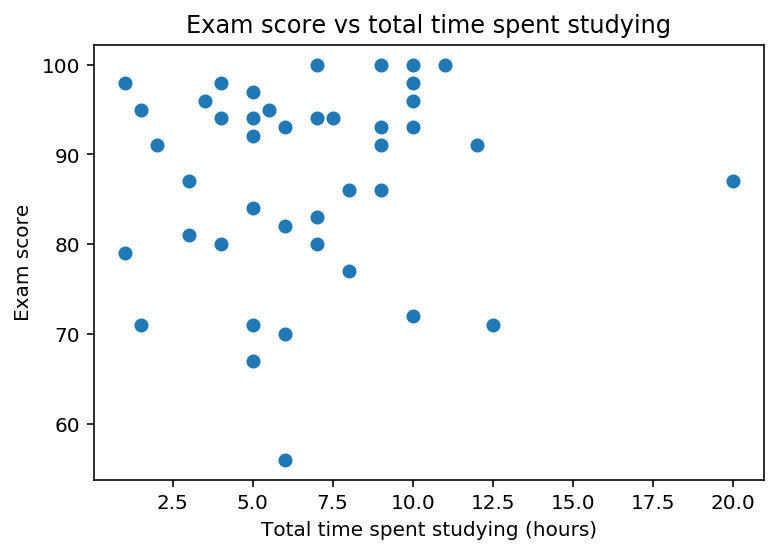

In [28]:
# this one is also free!

studyDuration = studyData['Total_time_spent_studying_hrs_-_estimate']
scores = studyData['Midterm_Score']

plt.scatter(studyDuration, scores)

plt.title('Exam score vs total time spent studying')
plt.xlabel('Total time spent studying (hours)')
plt.ylabel('Exam score')

Text(0, 0.5, 'Exam score')

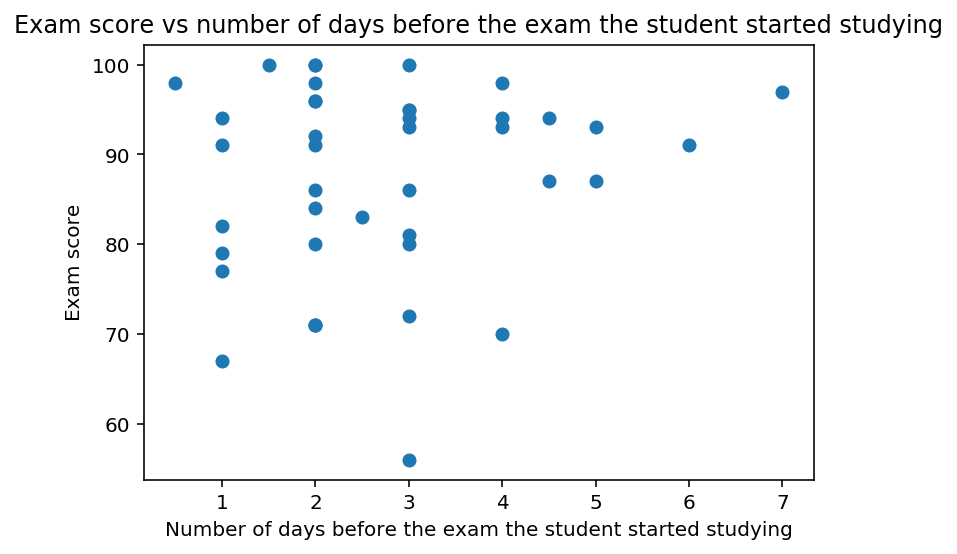

In [29]:
numberOfSessions = studyData['Number_of_days_before_the_exam_I_started_studying:']
scores2 = studyData['Midterm_Score']

plt.scatter(numberOfSessions, scores2)

plt.title('Exam score vs number of days before the exam the student started studying')
plt.xlabel('Number of days before the exam the student started studying')
plt.ylabel('Exam score')

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial phase our this homework, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up** Formulate and describe a question and a hypothesis to answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

### Problem 5

Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of you're goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

Here's yet another _free_ cell; use as many as you need.

#### Problem 5: Explanation
In the 4 cells below, I am providing the functions necessary to create a line of best fit for my scatter plots.

In [30]:
def variance(x):
    '''computes the sample variance of observations X given the formula above'''
    
    n = x.shape[0]
    
    # your code here
    xbar = np.average(x)
    x = x - xbar
    var = (1/(n-1))*np.sum(x*x)
    
    return var

In [31]:
def covariance(x, y):
    '''computes the sample covariance of X and Y given the formula above'''
    
    assert x.shape == y.shape, 'dimensions of X and Y should match in 1D linear regression'
    
    n = x.shape[0]
    
    # your code here
    xbar = np.average(x)
    ybar = np.average(y)
    y = y - ybar
    x = x - xbar
    cov = (1/(n-1))*np.sum(np.multiply(x, y))
    
    return cov

In [32]:
def fit(x, y):
    '''computes model parameters W and B that best-fit observation data X and Y'''
    
    assert x.shape == y.shape, 'dimensions of X and Y should match in 1D linear regression'
    
    # your code here
    n = x.shape[0]
    w = (covariance(x, y)/variance(x))
    b = (1/n)*np.sum(y) - (w/n)*np.sum(x)
    
    assert np.isscalar(w) and np.isscalar(b), 'W and B should be scalars in 1D linear regression'
    
    return w, b

In [33]:
def predict(w, b, x):
    '''computes the predicted values of X given model parameters W and B'''
    
    assert np.isscalar(w) and np.isscalar(b), 'W and B should be scalars in 1D linear regression'
    if not isinstance(x, int):
        assert len(x.shape) == 1, 'X should be an int or n x 1 array'
    
    # your code here
    y = w*x + b
    
    return y

#### Problem 5: Explanation

In the cell below, I am plotting a line of best fit on my scatter plot for hours spent studying as compared to midterm score (to further investigate the correlation between the two). The plot and line of best fit refute my hypothesis that total number of hours spent studying would have a strong positive correlation with exam score (because the line is almost horizontal, indicating very low correlation).

Text(0, 0.5, 'Exam score')

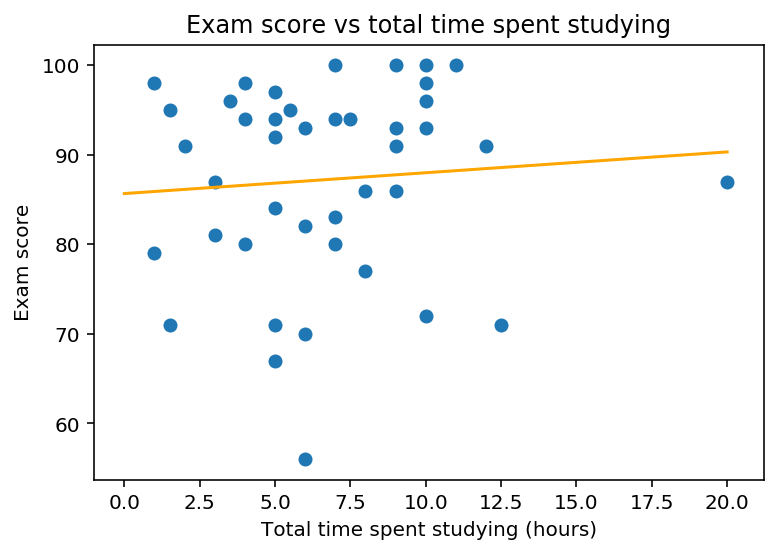

In [34]:
studyDuration = studyData['Total_time_spent_studying_hrs_-_estimate']
scores = studyData['Midterm_Score']

w, b = fit(studyDuration, scores)

# create an array with 1000 equally spaced values in the range 0 to x.max
x_star = np.linspace(0, studyDuration.max(), 1000)

# get the predictions for each of those values
y_star = predict(w, b, x_star)

#plot line of best fit
plt.plot(x_star, y_star, color="orange")

plt.scatter(studyDuration, scores)

plt.title('Exam score vs total time spent studying')
plt.xlabel('Total time spent studying (hours)')
plt.ylabel('Exam score')

#### Problem 5: Explanation 

In the cell below, I am plotting a line of best fit on my scatter plot for number of days before the exam students began studying as compared to midterm score (to further investigate the correlation between the two). The plot and line of best fit refute my hypothesis that the number of days before the exam a student began studying would have a strong positive correlation with exam score (because, again, the line is almost horizontal, indicating very low correlation).

Text(0, 0.5, 'Exam score')

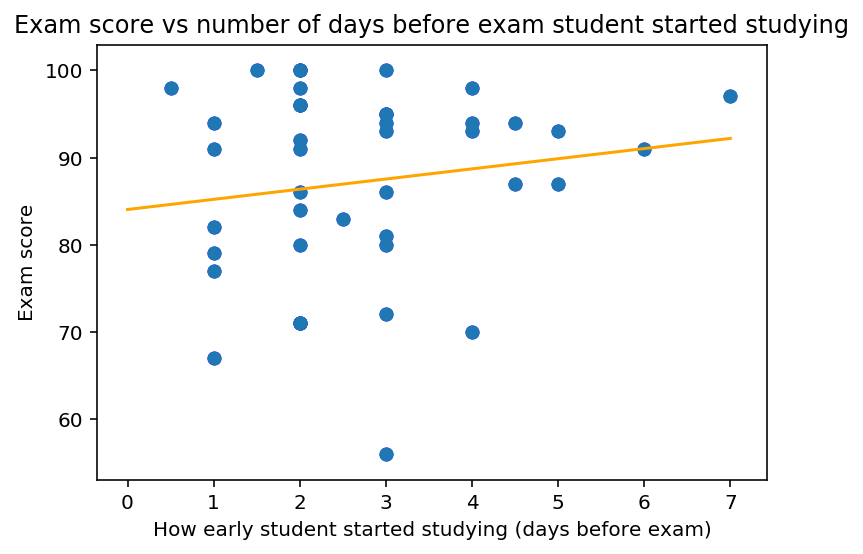

In [35]:
numberOfDays = studyData['Number_of_days_before_the_exam_I_started_studying:']
scores2 = studyData['Midterm_Score']

plt.scatter(numberOfDays, scores2, color="blue")

plt.title('Exam score vs number of days before the exam the student started studying')
plt.xlabel('Number of days before the exam the student started studying')
plt.ylabel('Exam score')

w2, b2 = fit(numberOfDays, scores)

# create an array with 1000 equally spaced values in the range 0 to x.max
x_star2 = np.linspace(0, numberOfDays.max(), 1000)

# get the predictions for each of those values
y_star2 = predict(w2, b2, x_star2)

#plot line of best fit
plt.plot(x_star2, y_star2, color="orange")

plt.scatter(numberOfDays, scores2)

plt.title('Exam score vs number of days before exam student started studying')
plt.xlabel('How early student started studying (days before exam)')
plt.ylabel('Exam score')

### Problem 6

Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. Can you make any recommendations for us? What might we try to improve the class? Don't worry if you didn't anything — you should still tell us about what you found (negative results are results too!).

It would be lovely if you could provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

### Problem 7

One last step that we shouldn't skip is reviewing the data acquisition method. There are often times where the data you need doesn't exist and you need to go collect it. As you probably already know, making surveys is an art and we would like to here how you might change it to collect better or more information in the future. 
> `Hint` You could discuss something like this: Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this survey do you think would be helpful to have for next time?

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_.